In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [5]:
sinasc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [7]:
sinasc1 = sinasc[['ESCMAE','IDADEMAE','DTNASC']]
sinasc1.head()


,ESCMAE,IDADEMAE,DTNASC
0,8 a 11 anos,19,2019-02-19
1,8 a 11 anos,29,2019-02-21
2,8 a 11 anos,37,2019-02-25
3,12 anos ou mais,30,2019-03-20
4,8 a 11 anos,30,2019-03-23


In [8]:


media = sinasc1.mean(numeric_only=True)

media


IDADEMAE    26.093718
dtype: float64

In [9]:
sinasc.ESCMAE.value_counts()

ESCMAE
8 a 11 anos        15633
12 anos ou mais     5767
4 a 7 anos          4760
1 a 3 anos           516
Nenhuma               40
Name: count, dtype: int64

In [10]:
sinasc1.groupby('ESCMAE').mean(numeric_only=True)

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000


In [11]:
#sinasc1.pivot_table(index='ESCMAE', numeric_only= True)
# Selecionar apenas colunas numéricas e fazer a pivot table
sinasc1_numeric = sinasc1[['ESCMAE'] + list(sinasc1.select_dtypes(include=[np.number]).columns)]
# Criar a tabela dinâmica com colunas numéricas
pivot_table_result = sinasc1_numeric.pivot_table(index='ESCMAE')
pivot_table_result

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000


In [13]:
sinasc1[['DTNASC','IDADEMAE']]


,DTNASC,IDADEMAE
0,2019-02-19,19
1,2019-02-21,29
2,2019-02-25,37
3,2019-03-20,30
4,2019-03-23,30
...,...,...
27023,2019-12-13,32
27024,2019-10-04,19
27025,2019-08-02,24
27026,2019-12-23,21


In [21]:
sinasc1.groupby('DTNASC')['IDADEMAE'].count().to_frame()

,IDADEMAE
DTNASC,
2019-01-01,48
2019-01-02,68
2019-01-03,77
2019-01-04,73
2019-01-05,71
...,...
2019-12-27,84
2019-12-28,59
2019-12-29,48


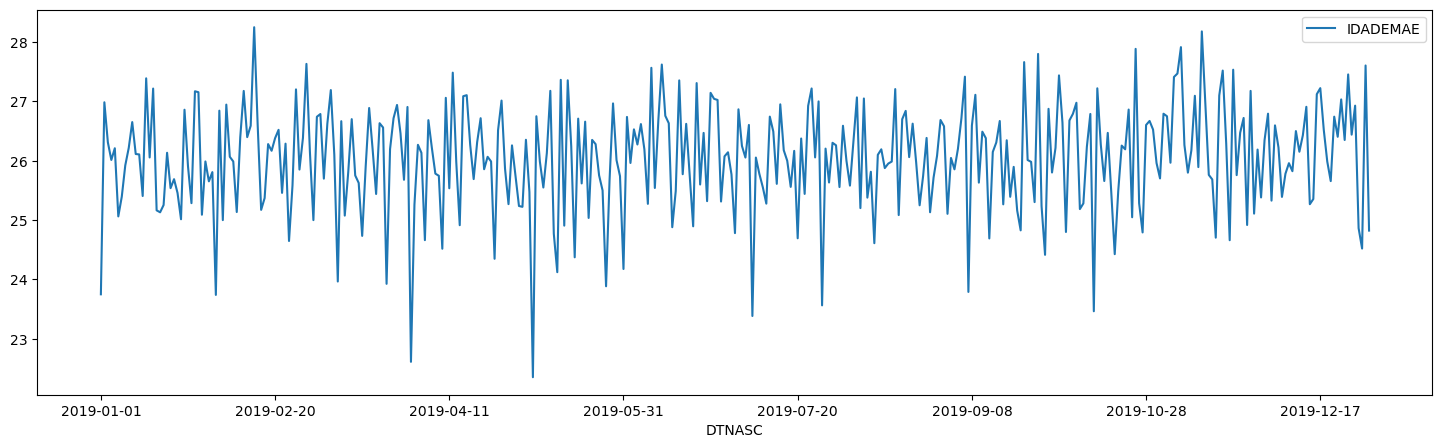

In [23]:
sinasc1.pivot_table(values='IDADEMAE', index='DTNASC', aggfunc='mean').plot(figsize=[18,5]);

In [34]:


esc = sinasc1.groupby('ESCMAE')

esc.mean(numeric_only=True)#media
esc.sum()#soma
esc.count()#contagem



,IDADEMAE,DTNASC
ESCMAE,,
1 a 3 anos,516,516
12 anos ou mais,5767,5767
4 a 7 anos,4760,4760
8 a 11 anos,15633,15633
Nenhuma,40,40


In [40]:
spai = sinasc[['ESCMAE','IDADEMAE','IDADEPAI']]

spai.shape

(27028, 3)

In [44]:
spai.IDADEPAI.isna().sum()


19421

In [48]:
spai.dropna().shape

(7543, 3)

In [50]:
result = spai.dropna().groupby('ESCMAE').median()
result

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,29.0,34.0
12 anos ou mais,30.0,32.0
4 a 7 anos,26.0,30.0
8 a 11 anos,25.0,29.0
Nenhuma,31.5,38.5


In [56]:
result['DIF'] =  result['IDADEPAI'] - result['IDADEMAE']
result.sort_values('DIF')

,IDADEMAE,IDADEPAI,DIF
ESCMAE,,,
12 anos ou mais,30.0,32.0,2.0
4 a 7 anos,26.0,30.0,4.0
8 a 11 anos,25.0,29.0,4.0
1 a 3 anos,29.0,34.0,5.0
Nenhuma,31.5,38.5,7.0


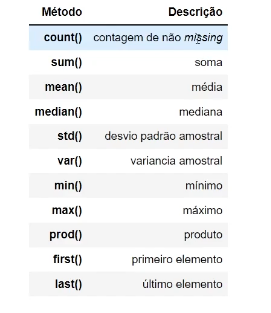

metodos do groupby()

In [60]:
# esse tal de metodo groupby() é poderoso pra karalho. abaixo vou testar eles em algumas situaçoes.

sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [104]:
QDD = sinasc.groupby('QTDFILVIVO')['IDADEMAE']

Text(0, 0.5, 'idade mae')

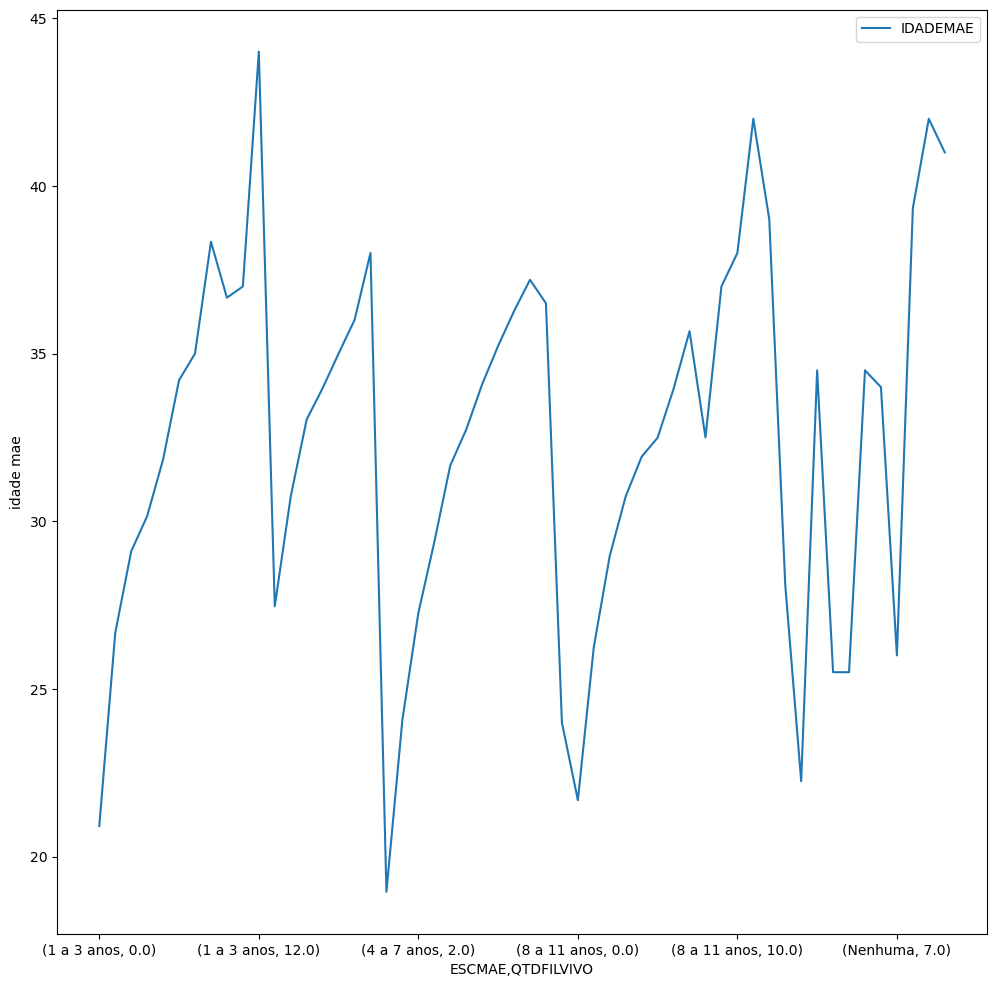

In [128]:
#QDD.plt.figsize(12,12)
#precisa somar algo pra plotar.

pp = sinasc.groupby(['ESCMAE', 'QTDFILVIVO'])['IDADEMAE'].mean().to_frame()

pp.plot(figsize=[12,12])
plt.ylabel('idade mae')



In [142]:
fem = sinasc[sinasc['SEXO'] == 'Feminino'].groupby('DTNASC')['IDADEMAE'].count()
#FILTRO ISSO KK
masc = sinasc[sinasc['SEXO'] == 'masculino'].groupby('DTNASC')['IDADEMAE'].count()


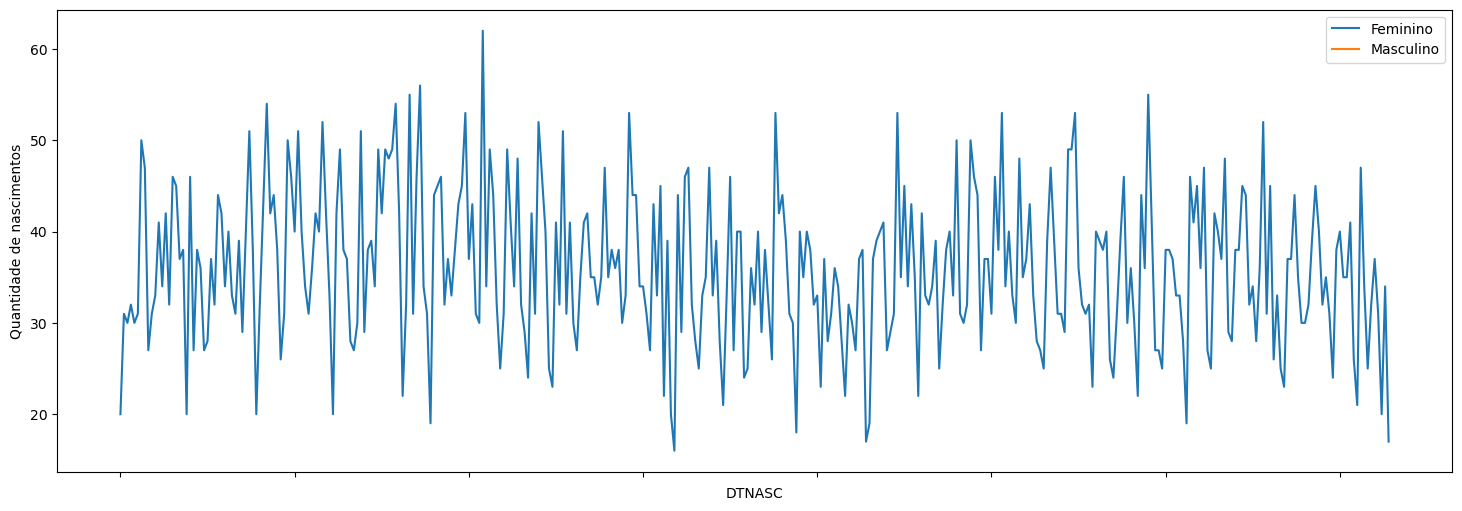

In [160]:
plt.ylabel('quantidade de nascimentos');

fem.plot(figsize=[18, 6], label='Feminino')

# Plotar o gráfico masculino na mesma figura
masc.plot(label='Masculino')

# Adicionar o rótulo do eixo y
plt.ylabel('Quantidade de nascimentos')

# Adicionar uma legenda para identificar as linhas
plt.legend()


In [162]:

sinasc.loc[:,'DTNASC'] = pd.to_datetime(sinasc['DTNASC'])
#MUDANDO TIPO DE OBJT PARA DATAFRAME
sinasc.set_index('DTNASC', inplace=True)
#TRANSFORMANDO EM INDICE ISSSO É PRA CALCULAR O DAY OF WEEK 
sinasc['DIADASEMANA'] = sinasc.index.dayofweek

C:\Users\gerar\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [164]:
sinasc.groupby('DIADASEMANA')['IDADEMAE'].count()

DIADASEMANA
0    4493
1    4024
2    4413
3    4138
4    3855
5    3183
6    2922
Name: IDADEMAE, dtype: int64

In [166]:
result = sinasc.groupby('DIADASEMANA')['IDADEMAE'].count()
result.index

Index([0, 1, 2, 3, 4, 5, 6], dtype='int32', name='DIADASEMANA')



# Aula 2 metodo agregate




In [169]:

sinasc = pd.read_csv('SINASC_RO_2019.csv')

In [ ]:
#metodo apply bota uma funçao em uma groupby.